# Toxic Tweets NLP Problem

In [2]:
#loading the dataset using Pandas
import pandas as pd
import numpy as np

df = pd.read_csv(r"FinalBalancedDataset.csv")

df.head(5)

,Unnamed: 0,Toxicity,tweet
0,0,0,@user when a father is dysfunctional and is s...
1,1,0,@user @user thanks for #lyft credit i can't us...
2,2,0,bihday your majesty
3,3,0,#model i love u take with u all the time in ...
4,4,0,factsguide: society now #motivation


In [3]:
df.describe

<bound method NDFrame.describe of        Unnamed: 0  Toxicity                                              tweet
0               0         0   @user when a father is dysfunctional and is s...
1               1         0  @user @user thanks for #lyft credit i can't us...
2               2         0                                bihday your majesty
3               3         0  #model   i love u take with u all the time in ...
4               4         0             factsguide: society now    #motivation
...           ...       ...                                                ...
56740       56740         1  you's a muthaf***in lie &#8220;@LifeAsKing: @2...
56741       56741         1  you've gone and broke the wrong heart baby, an...
56742       56742         1  young buck wanna eat!!.. dat nigguh like I ain...
56743       56743         1              youu got wild bitches tellin you lies
56744       56744         0  ~~Ruffled | Ntac Eileen Dahlia - Beautiful col...

[56745 rows x 3 c

In [4]:
df.shape

(56745, 3)

In [5]:
#To check if any null values 
df['tweet'].isna().sum()

0

In [6]:
df['Toxicity'].isna().sum()

0

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.shape

(56745, 3)

In [9]:
# Data Cleaning -- Removing unneccasary characters in the dataset 
#removing numbers

df['cleaned_tweet'] = df['tweet'].apply(lambda x: ' '.join([tweet for tweet in x.split() if not tweet == '\d*' ]))

In [10]:
df.head()

,Unnamed: 0,Toxicity,tweet,cleaned_tweet
0,0,0,@user when a father is dysfunctional and is s...,@user when a father is dysfunctional and is so...
1,1,0,@user @user thanks for #lyft credit i can't us...,@user @user thanks for #lyft credit i can't us...
2,2,0,bihday your majesty,bihday your majesty
3,3,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ur...
4,4,0,factsguide: society now #motivation,factsguide: society now #motivation


In [11]:
# to remove '@'

df['cleaned_tweet'] = df['cleaned_tweet'].apply(lambda x: ' '.join([tweet for tweet in x.split() if not tweet.startswith("@")]))


In [12]:
df.head()

,Unnamed: 0,Toxicity,tweet,cleaned_tweet
0,0,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so selfi...
1,1,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause they...
2,2,0,bihday your majesty,bihday your majesty
3,3,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ur...
4,4,0,factsguide: society now #motivation,factsguide: society now #motivation


In [13]:
#removing greek characters
import unidecode
import re

df['cleaned_tweet'] = df['cleaned_tweet'].apply(lambda x : ' '.join([unidecode.unidecode(word) for word in x.split()]))

df.head(15)


,Unnamed: 0,Toxicity,tweet,cleaned_tweet
0,0,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so selfi...
1,1,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause they...
2,2,0,bihday your majesty,bihday your majesty
3,3,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ur...
4,4,0,factsguide: society now #motivation,factsguide: society now #motivation
5,5,0,[2/2] huge fan fare and big talking before the...,[2/2] huge fan fare and big talking before the...
6,6,0,@user camping tomorrow @user @user @user @use...,camping tomorrow dannya|
7,7,0,the next school year is the year for exams.ð...,the next school year is the year for exams.d- ...
8,8,0,we won!!! love the land!!! #allin #cavs #champ...,we won!!! love the land!!! #allin #cavs #champ...
9,9,0,@user @user welcome here ! i'm it's so #gr...,welcome here ! i'm it's so #gr8 !


In [14]:
df['cleaned_tweet'][10]

'a #ireland consumer price index (mom) climbed from previous 0.2% to 0.5% in may #blog #silver #gold #forex'

In [15]:
#Code for removing slang words
d = {'luv':'love','wud':'would','lyk':'like','wateva':'whatever','ttyl':'talk to you later',
               'kul':'cool','fyn':'fine','omg':'oh my god!','fam':'family','bruh':'brother',
               'cud':'could','fud':'food','bihday': 'birthday'} ## Need a huge dictionary
words = "I luv myself"
words = words.split()
reformed = [d[word] if word in d else word for word in words]
reformed = " ".join(reformed)

In [16]:
df['cleaned_tweet'] = df['cleaned_tweet'].apply(lambda x: ' '.join([d[word] if word in d else word for word in x.split()]))


In [17]:
df.head()

,Unnamed: 0,Toxicity,tweet,cleaned_tweet
0,0,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so selfi...
1,1,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause they...
2,2,0,bihday your majesty,birthday your majesty
3,3,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ur...
4,4,0,factsguide: society now #motivation,factsguide: society now #motivation


In [18]:
#finding words with hashtag
df['#'] = df['cleaned_tweet'].apply(lambda x : ' '.join([word for word in x.split() if word.startswith('#')]))

df.head()

,Unnamed: 0,Toxicity,tweet,cleaned_tweet,#
0,0,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so selfi...,#run
1,1,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause they...,#lyft #disapointed #getthanked
2,2,0,bihday your majesty,birthday your majesty,
3,3,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ur...,#model
4,4,0,factsguide: society now #motivation,factsguide: society now #motivation,#motivation


In [19]:
hashtag = df['#']

hashtag.head()

0                              #run
1    #lyft #disapointed #getthanked
2                                  
3                            #model
4                       #motivation
Name: #, dtype: object

In [20]:
type(hashtag)

pandas.core.series.Series

In [22]:
hashtag = pd.DataFrame(hashtag)

In [24]:
hashtag = hashtag.rename({'#' : 'count #'},axis = 'columns')

In [25]:
hashtag.head()

,count #
0,#run
1,#lyft #disapointed #getthanked
2,
3,#model
4,#motivation


In [27]:
hashtag[hashtag['count #'] == ''] = 'No hashtags'

In [28]:
hashtag.head()

,count #
0,#run
1,#lyft #disapointed #getthanked
2,No hashtags
3,#model
4,#motivation


In [29]:
df.head()

,Unnamed: 0,Toxicity,tweet,cleaned_tweet,#
0,0,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so selfi...,#run
1,1,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause they...,#lyft #disapointed #getthanked
2,2,0,bihday your majesty,birthday your majesty,
3,3,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ur...,#model
4,4,0,factsguide: society now #motivation,factsguide: society now #motivation,#motivation


In [30]:
hashtag_df = pd.concat([df,hashtag],axis = 1)

In [32]:
hashtag_df.head()

,Unnamed: 0,Toxicity,tweet,cleaned_tweet,#,count #
0,0,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so selfi...,#run,#run
1,1,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause they...,#lyft #disapointed #getthanked,#lyft #disapointed #getthanked
2,2,0,bihday your majesty,birthday your majesty,,No hashtags
3,3,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ur...,#model,#model
4,4,0,factsguide: society now #motivation,factsguide: society now #motivation,#motivation,#motivation


In [33]:
hashtag_df.drop('#',axis = 1,inplace = True)

In [34]:
hashtag_df.head(10)

,Unnamed: 0,Toxicity,tweet,cleaned_tweet,count #
0,0,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so selfi...,#run
1,1,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause they...,#lyft #disapointed #getthanked
2,2,0,bihday your majesty,birthday your majesty,No hashtags
3,3,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ur...,#model
4,4,0,factsguide: society now #motivation,factsguide: society now #motivation,#motivation
5,5,0,[2/2] huge fan fare and big talking before the...,[2/2] huge fan fare and big talking before the...,#allshowandnogo
6,6,0,@user camping tomorrow @user @user @user @use...,camping tomorrow dannya|,No hashtags
7,7,0,the next school year is the year for exams.ð...,the next school year is the year for exams.d- ...,#school #exams #hate #imagine #actorslife #rev...
8,8,0,we won!!! love the land!!! #allin #cavs #champ...,we won!!! love the land!!! #allin #cavs #champ...,#allin #cavs #champions #cleveland #clevelandc...
9,9,0,@user @user welcome here ! i'm it's so #gr...,welcome here ! i'm it's so #gr8 !,#gr8


In [35]:
hashtag_df = hashtag_df.rename({'count #':'Hash words'},axis = 'columns')

In [41]:
#Removing stop words
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Vijai\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [44]:
hashtag_df['cleaned_tweet'] = hashtag_df['cleaned_tweet'].apply(lambda x : ' '.join([word for word in x.split() if not word in set(stopwords.words('english'))]))

In [46]:
hashtag_df.head()

,Unnamed: 0,Toxicity,tweet,cleaned_tweet,Hash words
0,0,0,@user when a father is dysfunctional and is s...,father dysfunctional selfish drags kids dysfun...,#run
1,1,0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit can't use cause offer whee...,#lyft #disapointed #getthanked
2,2,0,bihday your majesty,birthday majesty,No hashtags
3,3,0,#model i love u take with u all the time in ...,#model love u take u time urd+-!!! dddd d|d|d|,#model
4,4,0,factsguide: society now #motivation,factsguide: society #motivation,#motivation


In [55]:
from nltk import WordNetLemmatizer
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Vijai\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Vijai\AppData\Roaming\nltk_data...


True

In [56]:
import warnings 
warnings.filterwarnings("ignore")

In [57]:
lemmatizer = WordNetLemmatizer()

lemmatized_tweets = []

for tweet in hashtag_df['cleaned_tweet']:
    words = tweet.split()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    lemmatized_tweet = ' '.join(lemmatized_words)
    lemmatized_tweets.append(lemmatized_tweet)

hashtag_df['cleaned_tweet'] = lemmatized_tweets

In [58]:
hashtag_df.head()

,Unnamed: 0,Toxicity,tweet,cleaned_tweet,Hash words
0,0,0,@user when a father is dysfunctional and is s...,father dysfunctional selfish drag kid dysfunct...,#run
1,1,0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit can't use cause offer whee...,#lyft #disapointed #getthanked
2,2,0,bihday your majesty,birthday majesty,No hashtags
3,3,0,#model i love u take with u all the time in ...,#model love u take u time urd+-!!! dddd d|d|d|,#model
4,4,0,factsguide: society now #motivation,factsguide: society #motivation,#motivation


In [59]:
from nltk.stem import PorterStemmer
nltk.download('punkt')
#from nltk.tokenize import word_tokenize 

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Vijai\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [61]:
#Stemming
ps = PorterStemmer()
hashtag_df['cleaned_tweet'] = hashtag_df['cleaned_tweet'].apply(lambda x : ' '.join([ps.stem(word) for word in x.split()]))

In [62]:
hashtag_df.head()

,Unnamed: 0,Toxicity,tweet,cleaned_tweet,Hash words
0,0,0,@user when a father is dysfunctional and is s...,father dysfunct selfish drag kid dysfunction. ...,#run
1,1,0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit can't use caus offer wheelc...,#lyft #disapointed #getthanked
2,2,0,bihday your majesty,birthday majesti,No hashtags
3,3,0,#model i love u take with u all the time in ...,#model love u take u time urd+-!!! dddd d|d|d|,#model
4,4,0,factsguide: society now #motivation,factsguide: societi #motiv,#motivation


In [64]:
#Tokenization
from nltk.tokenize import word_tokenize 
corpus = []
for i in range(0,31962):
    tweet = hashtag_df['cleaned_tweet'][i]
    tweet = tweet.lower()
    tweet = tweet.split()
    tweet = [ps.stem(word) for word in tweet if not word in set(stopwords.words('english'))]
    tweet = ' '.join(tweet)
    corpus.append(tweet)

In [65]:
len(corpus)

31962

In [66]:
corpus

['father dysfunct selfish drag kid dysfunction. #run',
 "thank #lyft credit can't use cau offer wheelchair van pdx. #disapoint #getthank",
 'birthday majesti',
 '#model love u take u time urd+-!!! dddd d|d|d|',
 'factsguide: societi #motiv',
 '[2/2] huge fan fare big talk leave. chao pay disput get there. #allshowandnogo',
 'camp tomorrow dannya|',
 "next school year year exams.d- can't think #school #exam #hate #imagin #actorslif #revolutionschool #girl",
 'won!!! love land!!! #allin #cav #champion #cleveland #clevelandcavali a|',
 "welcom ! i'm #gr8 !",
 '#ireland consum price index (mom) climb previou 0.2% 0.5% may #blog #silver #gold #forex',
 'selfish. #orlando #standwithorlando #pulseshoot #orlandoshoot #biggerproblem #selfish #heabreak #valu #love #',
 'get see daddi today!! #80day #gettingf',
 "#cnn call #michigan middl school 'build wall' chant '' #tcot",
 'comment! #australia #opkillingbay #seashepherd #helpcovedolphin #thecov #helpcovedolphin',
 'ouch...junior angryd#got7 #j

In [70]:
pip install wordcloud


     -------------------------------------- 152.1/152.1 kB 1.5 MB/s eta 0:00:00


Normal words


(-0.5, 799.5, 499.5, -0.5)

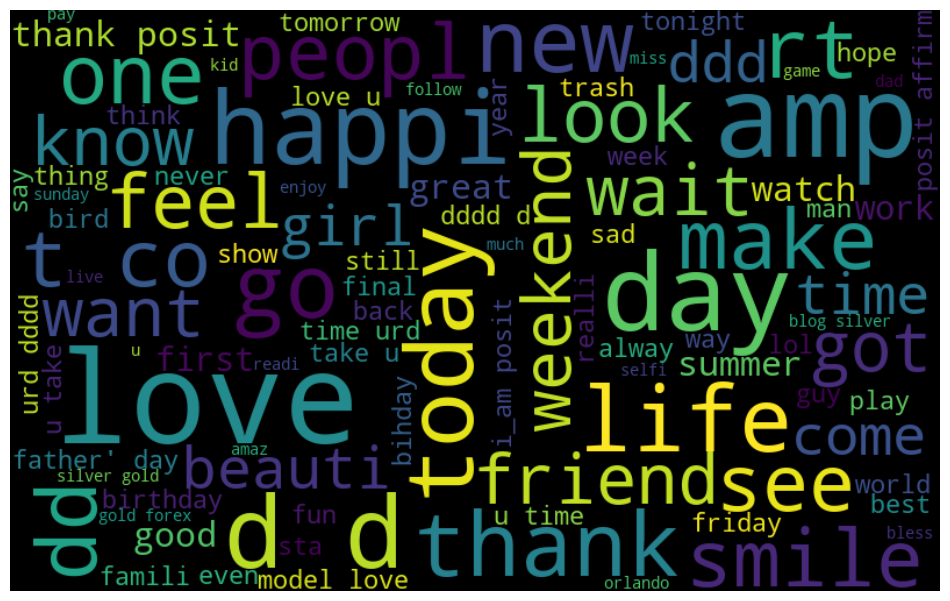

In [73]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

normal_words = ' '.join([word for word in hashtag_df['cleaned_tweet'][hashtag_df['Toxicity'] == 0]])
wordcloud = WordCloud(width = 800, height = 500, max_font_size = 110,max_words = 100).generate(normal_words)
print('Normal words')
plt.figure(figsize= (12,8))
plt.imshow(wordcloud, interpolation = 'bilinear',cmap='viridis')
plt.axis('off')

Normal words


(-0.5, 799.5, 499.5, -0.5)

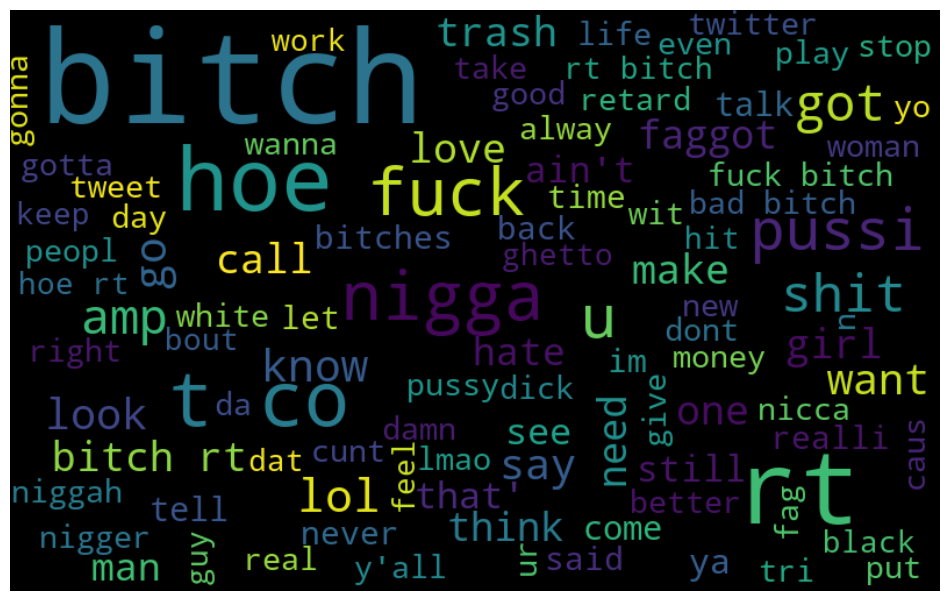

In [74]:
normal_words = ' '.join([word for word in hashtag_df['cleaned_tweet'][hashtag_df['Toxicity'] == 1]])
wordcloud = WordCloud(width = 800, height = 500, max_font_size = 110,max_words = 100).generate(normal_words)
print('Normal words')
plt.figure(figsize= (12,8))
plt.imshow(wordcloud, interpolation = 'bilinear',cmap='viridis')
plt.axis('off')

In [151]:
#collecting positive and negative hashtags

positive_hashtags = []
negative_hashtags = []

def extract(x):
    hashtags = []
    for i in x:
        nht = re.sub(r'#\d+', '', i)
        ht = re.findall(r"#(\w+)", nht)
    
        hashtags.append(ht)
    return hashtags

In [152]:
positive_hashtags = extract(hashtag_df['cleaned_tweet'][hashtag_df['Toxicity'] == 0])

negative_hashtags = extract(hashtag_df['cleaned_tweet'][hashtag_df['Toxicity'] == 1])

# Converting a multidimensional list to a 1-D list
positive_hashtags = sum(positive_hashtags,[])
negative_hashtags = sum(negative_hashtags,[])

In [153]:
from collections import Counter
p = Counter(positive_hashtags)
p =dict(p.most_common())

In [154]:
print(p)

{'love': 1579, 'posit': 905, 'smile': 636, 'healthi': 558, 'thank': 527, 'fun': 434, 'affirm': 422, 'life': 399, 'model': 374, 'summer': 361, 'cute': 356, 'blog': 355, 'i_am': 352, 'beauti': 347, 'fathersday': 332, 'me': 331, 'happi': 328, 'friend': 319, 'silver': 299, 'gold': 298, 'bihday': 283, 'music': 277, 'day': 275, 'altwaystoh': 272, 'famili': 270, 'a': 268, 'weekend': 267, 'girl': 265, 'forex': 265, 'selfi': 252, 'quot': 249, 'orlando': 235, 'friday': 231, 'bless': 214, 'instagood': 213, 'motiv': 196, 'father': 192, 'inspir': 179, 'dog': 174, 'peac': 173, 'work': 172, 'sun': 171, 'sunday': 158, 'photooftheday': 158, 'dad': 156, 'grate': 152, 'travel': 149, 'fashion': 144, 'followm': 144, 'funni': 136, 'heal': 133, 'tbt': 133, 'holiday': 130, 'euro2016': 129, 'fit': 128, 'follow': 127, 'home': 124, 'depress': 124, 'wed': 118, 'beach': 116, 'success': 115, 'enjoy': 114, 'food': 112, 'cool': 111, 'hot': 107, 'babi': 107, 'joy': 105, 'relax': 103, 'shop': 102, 'new': 102, 'live': 9

In [155]:
positive_count = list(p.values())

In [156]:
positive_count[0:4]

[1579, 905, 636, 558]

In [157]:
q = Counter(negative_hashtags)
q = dict(q.most_common())

{'trump': 133, 'polit': 94, 'allahsoil': 92, 'liber': 83, 'libtard': 78, 'sjw': 75, 'retweet': 57, 'iphone': 50, 'xxx': 50, 'porn': 48, 'android': 48, 'ipad': 48, 'sex': 48, 'black': 46, 'tcot': 45, 'miamia': 38, 'hate': 37, 'obama': 37, 'bigot': 35, 'tampa': 32, 'blm': 28, 'hispan': 28, 'brexit': 27, 'sikh': 27, 'teabagg': 27, 'templ': 26, 'calgary': 26, 'wso': 26, 'malevot': 24, 'america': 24, 'maga': 24, 'seashepherd': 22, 'bitch': 22, 'leadership': 21, 'blacklivesmatt': 20, 'feminismiscanc': 20, 'feminismisterror': 20, 'feminismmuktbharat': 20, 'misogynist': 20, 'antirac': 20, 'a': 19, 'faggot': 19, 'bigotri': 18, 'altright': 17, 'resist': 17, 'nazi': 16, 'white': 16, 'misogyni': 16, 'carlpaladino': 15, 'israel': 15, 'notmypresid': 15, 'u': 15, 'kkk': 15, 'morningjo': 15, 'pussi': 15, 'love': 14, 'race': 14, 'homophob': 14, 'isi': 14, 'emirati': 14, 'teambt': 14, 'republican': 13, 'usa': 13, 'gop': 13, 'american': 13, 'southafrica': 13, 'putinschoic': 13, 'boycott': 13, 'retard': 1

In [161]:
negative_count = list(q.values())


In [162]:
negative_count[0:4]

[133, 94, 92, 83]

In [163]:
positive_wordcount = list(p.keys())

In [164]:
positive_wordcount[0:4]

['love', 'posit', 'smile', 'healthi']

In [165]:
negative_wordcount = list(q.keys())

In [167]:
negative_wordcount[0:4]

['trump', 'polit', 'allahsoil', 'liber']

In [168]:
#Creating a dataframe to represent top 50 positive and negative hash words
l1 = pd.DataFrame(positive_count[0:50],columns = ['Positive_Words'])
l2 = pd.DataFrame(positive_wordcount[0:50],columns = ['Positive_Count'])
l3 = pd.DataFrame(negative_count[0:50],columns = ['Negative_Words'])
l4 = pd.DataFrame(negative_wordcount[0:50],columns = ['Negative_Count'])
z = pd.concat([l1,l2,l3,l4],axis = 1)
z

,Positive_Words,Positive_Count,Negative_Words,Negative_Count
0,1579,love,133,trump
1,905,posit,94,polit
2,636,smile,92,allahsoil
3,558,healthi,83,liber
4,527,thank,78,libtard
5,434,fun,75,sjw
6,422,affirm,57,retweet
7,399,life,50,iphone
8,374,model,50,xxx
9,361,summer,48,porn


In [169]:
import matplotlib.animation as animation
import operator
import plotly.express as px

In [170]:
#Normal histogram of positive words
fig = px.bar(z, x="Positive_Words", y="Positive_Count",
            hover_name="Positive_Words",color = 'Positive_Count')
fig.show()

In [172]:
#Normal histogram of negative words
fig = px.bar(z, x="Negative_Words", y="Negative_Count",
            hover_name="Negative_Words",color= 'Negative_Count')
fig.show()

In [173]:
hashtag_df.head()

,Unnamed: 0,Toxicity,tweet,cleaned_tweet,Hash words
0,0,0,@user when a father is dysfunctional and is s...,father dysfunct selfish drag kid dysfunction. ...,#run
1,1,0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit can't use caus offer wheelc...,#lyft #disapointed #getthanked
2,2,0,bihday your majesty,birthday majesti,No hashtags
3,3,0,#model i love u take with u all the time in ...,#model love u take u time urd+-!!! dddd d|d|d|,#model
4,4,0,factsguide: society now #motivation,factsguide: societi #motiv,#motivation


In [174]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_df= 0.9, min_df= 2, stop_words='english')
#Matrix
x1 = tfidf_vectorizer.fit_transform(corpus).toarray()
y1 = df.loc[:,'Toxicity'].values

In [175]:
from sklearn.model_selection import train_test_split
x1_train,x1_test,y1_train,y1_test = train_test_split(hashtag_df['cleaned_tweet'], hashtag_df['Toxicity'], test_size = 0.3 , shuffle = True , stratify = hashtag_df['Toxicity'])
vectorizer = TfidfVectorizer()
x_train_vector = vectorizer.fit_transform(x_train)
y1 = df.loc[:,'Toxicity'].values

In [182]:
#Random Forest using pipelines
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
rf = Pipeline([('tfidf', TfidfVectorizer()), ('rf', RandomForestClassifier())])
rf.fit(x1_train, y1_train)
y_pred = rf.predict(x1_test)
print(pd.crosstab(y1_test,y_pred,rownames=['Actual'],colnames=['Predicted']))
print(classification_report(y1_test, y_pred))

Predicted     0     1
Actual               
0          9189   589
1           520  6726
              precision    recall  f1-score   support

           0       0.95      0.94      0.94      9778
           1       0.92      0.93      0.92      7246

    accuracy                           0.93     17024
   macro avg       0.93      0.93      0.93     17024
weighted avg       0.93      0.93      0.93     17024



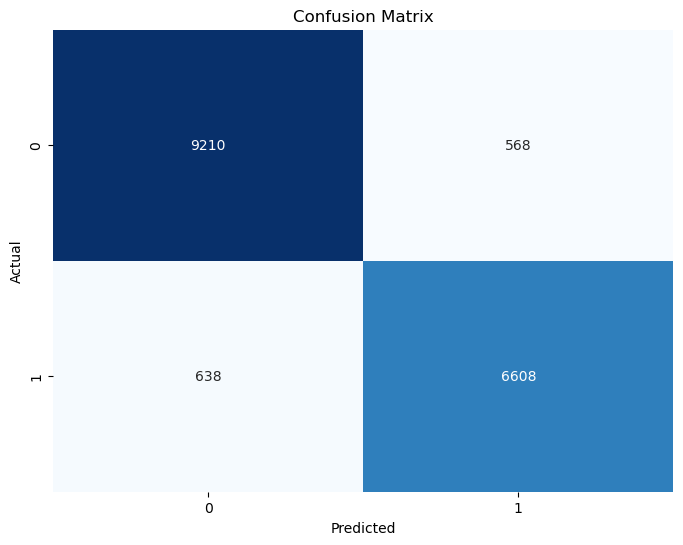

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      9778
           1       0.92      0.91      0.92      7246

    accuracy                           0.93     17024
   macro avg       0.93      0.93      0.93     17024
weighted avg       0.93      0.93      0.93     17024



In [183]:
# Create a pipeline for Decision Trees
from sklearn.tree import DecisionTreeClassifier
dt = Pipeline([('tfidf', TfidfVectorizer()), ('dt', DecisionTreeClassifier())])

dt.fit(x1_train, y1_train)

y_pred = dt.predict(x1_test)

confusion = pd.crosstab(y1_test, y_pred, rownames=['Actual'], colnames=['Predicted'])

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
print(classification_report(y1_test, y_pred))



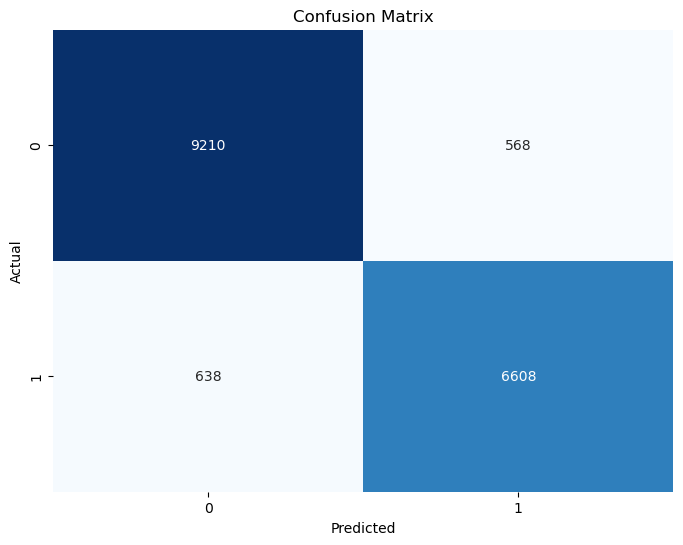

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      9778
           1       0.92      0.91      0.92      7246

    accuracy                           0.93     17024
   macro avg       0.93      0.93      0.93     17024
weighted avg       0.93      0.93      0.93     17024



In [184]:
# Create a pipeline for Decision Trees
from sklearn.tree import DecisionTreeClassifier
dt = Pipeline([('tfidf', TfidfVectorizer()), ('dt', DecisionTreeClassifier())])

dt.fit(x1_train, y1_train)

y_pred = dt.predict(x1_test)

confusion = pd.crosstab(y1_test, y_pred, rownames=['Actual'], colnames=['Predicted'])

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
print(classification_report(y1_test, y_pred))

In [185]:
from sklearn.neighbors import KNeighborsClassifier

knn = Pipeline([('tfidf', TfidfVectorizer()), ('knn', RandomForestClassifier())])
knn.fit(x1_train, y1_train)
y_pred = rf.predict(x1_test)
print(pd.crosstab(y1_test,y_pred,rownames=['Actual'],colnames=['Predicted']))
print(classification_report(y1_test, y_pred))

Predicted     0     1
Actual               
0          9189   589
1           520  6726
              precision    recall  f1-score   support

           0       0.95      0.94      0.94      9778
           1       0.92      0.93      0.92      7246

    accuracy                           0.93     17024
   macro avg       0.93      0.93      0.93     17024
weighted avg       0.93      0.93      0.93     17024



In [186]:
from sklearn.svm import SVC

svm = Pipeline([('tfidf', TfidfVectorizer()), ('svm', RandomForestClassifier())])
svm.fit(x1_train, y1_train)
y_pred = rf.predict(x1_test)
print(pd.crosstab(y1_test,y_pred,rownames=['Actual'],colnames=['Predicted']))
print(classification_report(y1_test, y_pred))

Predicted     0     1
Actual               
0          9189   589
1           520  6726
              precision    recall  f1-score   support

           0       0.95      0.94      0.94      9778
           1       0.92      0.93      0.92      7246

    accuracy                           0.93     17024
   macro avg       0.93      0.93      0.93     17024
weighted avg       0.93      0.93      0.93     17024



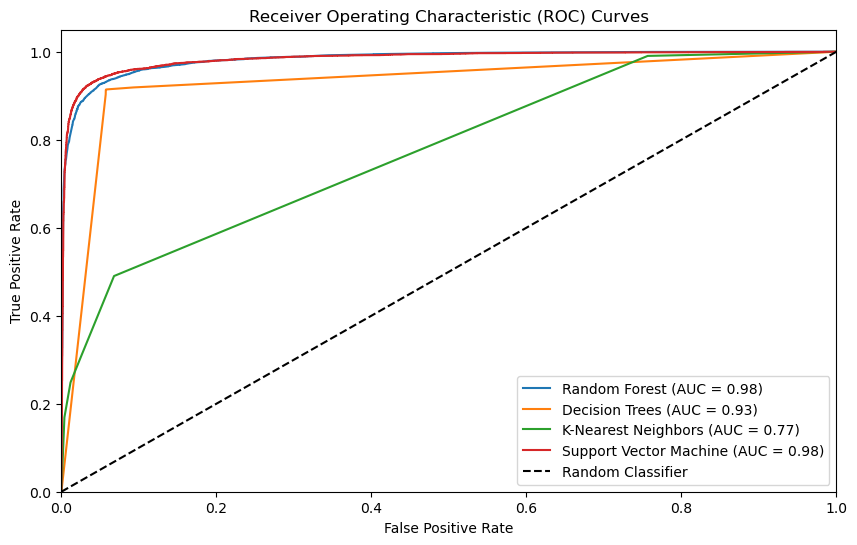

Random Forest AUC: 0.98
Decision Trees AUC: 0.93
K-Nearest Neighbors AUC: 0.77
Support Vector Machine AUC: 0.98


In [190]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Split the data into training and testing sets
x1_train, x1_test, y1_train, y1_test = train_test_split(hashtag_df['cleaned_tweet'], hashtag_df['Toxicity'], test_size=0.3, shuffle=True, stratify=hashtag_df['Toxicity'])

# Create TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.9, min_df=2, stop_words='english')

# Define models
models = [
    ('Random Forest', Pipeline([('tfidf', tfidf_vectorizer), ('rf', RandomForestClassifier())])),
    ('Decision Trees', Pipeline([('tfidf', tfidf_vectorizer), ('dt', DecisionTreeClassifier())])), 
    ('K-Nearest Neighbors', Pipeline([('tfidf', tfidf_vectorizer), ('knn', KNeighborsClassifier())])),
    ('Support Vector Machine', Pipeline([('tfidf', tfidf_vectorizer), ('svm', SVC(probability=True))]))
]


# Initialize an empty dictionary to store AUC scores
auc_scores = {}

# Plot ROC curves for each model
plt.figure(figsize=(10, 6))
for model_name, model in models:
    model.fit(x1_train, y1_train)
    y_scores = model.predict_proba(x1_test)[:, 1]  # Get predicted probabilities for class 1
    fpr, tpr, _ = roc_curve(y1_test, y_scores)
    auc_scores[model_name] = roc_auc_score(y1_test, y_scores)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_scores[model_name]:.2f})')

# Plot the ROC curve for a random classifier (baseline)
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')
plt.show()

# Display AUC scores
for model_name, auc_score in auc_scores.items():
    print(f'{model_name} AUC: {auc_score:.2f}')